In [17]:
# Import necessary libraries
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [3]:
# os.chdir('/Users/gowtham/Documents/python/SCB/airflow/airflow_docker/')

In [4]:
# Extract the images

images_ = []
labels_ = []

dataset_path = '/Users/gowtham/Documents/python/SCB/airflow/airflow_docker/data'
df = pd.DataFrame(columns=["file_name", "class", "image"])

try:
    image_size = input("Enter the resizing width and height of the image(e.g., 128, 128): ")
    # Validate user input for image size
    image_size = eval(image_size)

    for labels in os.listdir(dataset_path + '/plant_images'):
        if labels != ".DS_Store":
            print(f"Processing class: {labels}")
            class_path = os.path.join(dataset_path + '/plant_images', labels)

            for img in os.listdir(class_path):
                image_path = os.path.join(class_path, img)
                image = cv2.imread(image_path)

                # Resize the image using OpenCV's resize function
                resized_image = cv2.resize(image, image_size)

                # Temporary list to store data for each image
                image_data = {"file_name": img, "class": labels, "image": resized_image}

                # Append data using pd.concat (recommended approach)
                df = pd.concat([df, pd.DataFrame.from_dict([image_data])], ignore_index=True)

except ValueError:
    print("Invalid input. Please enter image size as width,height (e.g., 128, 128).")
    exit()

# After processing all images, consider saving the DataFrame
if len(df) > 0:
    df.to_csv(dataset_path + "/preprocess_1/plant_image_data.csv", index=False)  # Save DataFrame as CSV


Processing class: potato_early_blight
Processing class: corn_maize_common_rust
Processing class: tomato_bacterial_spot


In [5]:
df.sample(10)

,file_name,class,image
478,RS_Rust 2606.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
695,e7dc7765-74e9-4cd8-94f1-a585c41bea16___GCREC_B...,tomato_bacterial_spot,"[[[121, 119, 131], [120, 118, 130], [106, 104,..."
761,f14c5648-4fde-4e6c-8937-6fb2e33aa95f___GCREC_B...,tomato_bacterial_spot,"[[[139, 140, 150], [139, 140, 150], [135, 136,..."
704,e1ee0df9-7ad3-47f4-ba57-0e243101a657___GCREC_B...,tomato_bacterial_spot,"[[[127, 117, 129], [127, 117, 129], [121, 111,..."
688,fa3f0b33-f0a0-4625-b7c9-135bea953d91___GCREC_B...,tomato_bacterial_spot,"[[[117, 119, 129], [112, 114, 124], [116, 118,..."
680,f1f7f16d-7794-4ac9-9962-32a5320d38fd___GCREC_B...,tomato_bacterial_spot,"[[[142, 143, 147], [145, 146, 150], [139, 140,..."
548,RS_Rust 2713.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
62,e40b6718-52b6-46a7-970c-5f1b6bae23af___RS_Earl...,potato_early_blight,"[[[142, 125, 128], [153, 136, 139], [136, 119,..."
640,eb36b979-d626-4f44-b6fe-0d4eec0f3081___UF.GRC_...,tomato_bacterial_spot,"[[[127, 125, 125], [131, 129, 129], [135, 133,..."
816,e928ca07-1757-4734-a146-b18176167cf9___GCREC_B...,tomato_bacterial_spot,"[[[121, 111, 123], [131, 121, 133], [125, 115,..."


In [6]:
df['file_name'].nunique

<bound method IndexOpsMixin.nunique of 0      bc7552e4-3901-41b8-8bef-727eeca4270e___RS_Earl...
1      d8a8d6e5-d82d-4f7c-aac5-183e85549d9b___RS_Earl...
2      d84ba2ee-6ef5-45b7-a15a-b677b99cd3f6___RS_Earl...
3      f164ce92-d109-47ca-9f75-380a7f16155a___RS_Earl...
4      faac446b-34ac-414a-9f0e-148d6ee87bfa___RS_Earl...
                             ...                        
895    f9299ed5-ac75-4849-a8b0-1e1b6c9d3097___GCREC_B...
896    e77c7af3-35cb-496d-bc8b-34bc2344b8fc___GCREC_B...
897    e2941eab-3c1c-43a2-aa6d-5f3926da0568___GCREC_B...
898    ea4ddb4b-216a-4ec2-85bc-06314c7de145___GCREC_B...
899    fc48610a-675f-4fdf-998d-5d877c909550___GCREC_B...
Name: file_name, Length: 900, dtype: object>

In [7]:
df1 = df[['file_name', 'class']]
df1.head()

,file_name,class
0,bc7552e4-3901-41b8-8bef-727eeca4270e___RS_Earl...,potato_early_blight
1,d8a8d6e5-d82d-4f7c-aac5-183e85549d9b___RS_Earl...,potato_early_blight
2,d84ba2ee-6ef5-45b7-a15a-b677b99cd3f6___RS_Earl...,potato_early_blight
3,f164ce92-d109-47ca-9f75-380a7f16155a___RS_Earl...,potato_early_blight
4,faac446b-34ac-414a-9f0e-148d6ee87bfa___RS_Earl...,potato_early_blight


In [8]:
df2 = df[['file_name', 'image']]
df2.head()

,file_name,image
0,bc7552e4-3901-41b8-8bef-727eeca4270e___RS_Earl...,"[[[196, 183, 185], [197, 184, 186], [201, 188,..."
1,d8a8d6e5-d82d-4f7c-aac5-183e85549d9b___RS_Earl...,"[[[159, 152, 155], [172, 165, 168], [146, 139,..."
2,d84ba2ee-6ef5-45b7-a15a-b677b99cd3f6___RS_Earl...,"[[[186, 168, 167], [192, 174, 173], [192, 174,..."
3,f164ce92-d109-47ca-9f75-380a7f16155a___RS_Earl...,"[[[208, 196, 196], [213, 201, 201], [199, 187,..."
4,faac446b-34ac-414a-9f0e-148d6ee87bfa___RS_Earl...,"[[[179, 161, 162], [179, 161, 162], [181, 163,..."


In [9]:
df = pd.merge(df1, df2, on='file_name')
df.sample(10)

,file_name,class,image
546,RS_Rust 2673.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
655,fae0f0ee-3a9a-403f-b95f-97caa0efaabd___GCREC_B...,tomato_bacterial_spot,"[[[146, 148, 159], [145, 147, 158], [145, 147,..."
825,ec84b7c0-20c8-4b60-9389-a0dbef553184___GCREC_B...,tomato_bacterial_spot,"[[[151, 152, 156], [153, 154, 158], [145, 146,..."
732,ff07f986-68db-49c2-9664-d154c2606228___UF.GRC_...,tomato_bacterial_spot,"[[[118, 120, 120], [119, 121, 121], [123, 125,..."
628,f3254462-bebf-48bc-84ce-93f88fddefe4___GCREC_B...,tomato_bacterial_spot,"[[[158, 157, 159], [153, 152, 154], [162, 161,..."
547,RS_Rust 2698.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
851,e98d37d3-7029-4de3-bdd9-955904454850___GCREC_B...,tomato_bacterial_spot,"[[[160, 156, 161], [160, 156, 161], [156, 152,..."
16,fc87399a-b45c-4b0f-a6c9-54f0e4f9d3c5___RS_Earl...,potato_early_blight,"[[[178, 164, 165], [186, 172, 173], [191, 177,..."
351,RS_Rust 2657.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
558,RS_Rust 2699.JPG,corn_maize_common_rust,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [10]:
len(df)

900

In [14]:
df.isnull().sum()

file_name    0
class        0
image        0
dtype: int64

In [18]:
# No missing values
# Vizualizing the images

def sample_img(df_val,n):
    df_val = df_val.sample(n)
    plt.figure(figsize=(20,20))
    for i,j in enumerate(df_val.iterrows()):
        plt.subplot(1,n,i+1)
        plt.imshow(j[1]['image'])
        plt.title("{}".format(j[1]['class'])) 

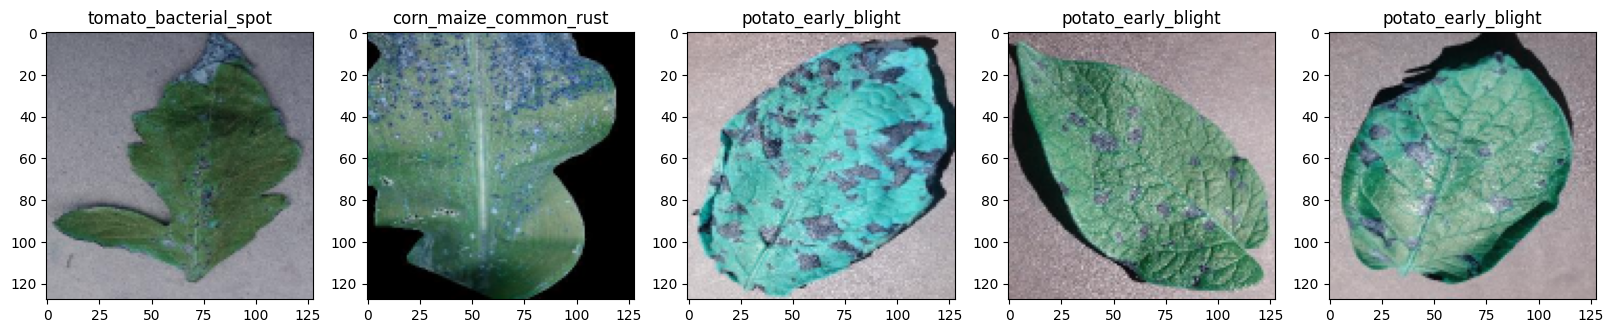

In [19]:
sample_img(df, 5)

In [20]:
# splitting dataset to train and test
from sklearn.model_selection import StratifiedShuffleSplit

# Define the class label column name (replace with your actual column name)
class_label = "class"

# Create a StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Split the data into train and test sets (assuming your data is in a pandas DataFrame called df)
for train_index, test_index in sss.split(df, df[class_label]):
    train_dataset = df.iloc[train_index]
    test_dataset = df.iloc[test_index]

In [ ]:
# Resizing the image suitable for model use
